In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
#%matplotlib inline

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['axes.grid'] = True
plt.gray()

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


<Figure size 432x288 with 0 Axes>

In [2]:
#!pip install pandas_profiling 
import pandas_profiling 

In [3]:

import scipy.stats as stat
import sklearn as sk
import statsmodels as sm


In [4]:
car_sales = pd.read_csv('C:/Users/tejan/Desktop/Data Analystics/class work/python stats class 12(linear regression)/1. Case Study - Automobile Example - Class Exercise/Car_sales.csv')

In [5]:
car_sales.head()

Manufacturer    Model  Sales_in_thousands  four_year_resale_value  \
0        Acura  Integra              16.919                  16.360   
1        Acura       TL              39.384                  19.875   
2        Acura       CL              14.114                  18.225   
3        Acura       RL               8.588                  29.725   
4         Audi       A4              20.397                  22.255   

  Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  \
0    Passenger               21.50          1.8       140.0      101.2   67.3   
1    Passenger               28.40          3.2       225.0      108.1   70.3   
2    Passenger                 NaN          3.2       225.0      106.9   70.6   
3    Passenger               42.00          3.5       210.0      114.6   71.4   
4    Passenger               23.99          1.8       150.0      102.6   68.2   

   Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0   172.4        2.639           13.2             28.0      2/2/2012   
1   192.9        3.517           17.2             25.0      6/3/2011   
2   192.0        3.470           17.2             26.0      1/4/2012   
3   196.6        3.850           18.0             22.0     3/10/2011   
4   178.0        2.998           16.4             27.0     10/8/2011   

   Power_perf_factor  
0          58.280150  
1          91.370778  
2                NaN  
3          91.389779  
4          62.777639

In [6]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

In [7]:
output = pandas_profiling.ProfileReport(car_sales)
output

In [8]:
car_sales.dtypes

Manufacturer               object
Model                      object
Sales_in_thousands        float64
four_year_resale_value    float64
Vehicle_type               object
Price_in_thousands        float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb_weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
Latest_Launch              object
Power_perf_factor         float64
dtype: object

In [9]:
car_sales_num = car_sales.loc[ :,car_sales.dtypes == 'float64']
car_sales_cat = car_sales.loc[ :,car_sales.dtypes == 'object']

In [10]:
car_sales_num.head(2)

Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
0              16.919                  16.360                21.5   
1              39.384                  19.875                28.4   

   Engine_size  Horsepower  Wheelbase  Width  Length  Curb_weight  \
0          1.8       140.0      101.2   67.3   172.4        2.639   
1          3.2       225.0      108.1   70.3   192.9        3.517   

   Fuel_capacity  Fuel_efficiency  Power_perf_factor  
0           13.2             28.0          58.280150  
1           17.2             25.0          91.370778

In [11]:
car_sales_cat.head(2)

Manufacturer    Model Vehicle_type Latest_Launch
0        Acura  Integra    Passenger      2/2/2012
1        Acura       TL    Passenger      6/3/2011

In [12]:
# dependent variable is sales in thousand 

car_sales_num.Sales_in_thousands.mean()

52.99807643312102

In [13]:
car_sales_num.describe(percentiles=[.01,.05,.25,.5,.75,.9,.95,.99]).T

count        mean        std         min         1%  \
Sales_in_thousands      157.0   52.998076  68.029422    0.110000    0.93728   
four_year_resale_value  121.0   18.072975  11.453384    5.160000    6.17300   
Price_in_thousands      155.0   27.390755  14.351653    9.235000   10.23144   
Engine_size             156.0    3.060897   1.044653    1.000000    1.55500   
Horsepower              156.0  185.948718  56.700321   55.000000   96.40000   
Wheelbase               156.0  107.487179   7.641303   92.600000   92.87500   
Width                   156.0   71.150000   3.451872   62.600000   66.08500   
Length                  156.0  187.343590  13.431754  149.400000  154.91500   
Curb_weight             155.0    3.378026   0.630502    1.895000    2.24540   
Fuel_capacity           156.0   17.951923   3.887921   10.300000   11.90000   
Fuel_efficiency         154.0   23.844156   4.282706   15.000000   15.00000   
Power_perf_factor       155.0   77.043591  25.142664   23.276272   38.46192   

                                5%         25%         50%         75%  \
Sales_in_thousands        1.870800   14.114000   29.450000   67.956000   
four_year_resale_value    7.850000   11.260000   14.180000   19.875000   
Price_in_thousands       12.469000   18.017500   22.799000   31.947500   
Engine_size               1.800000    2.300000    3.000000    3.575000   
Horsepower              114.500000  149.500000  177.500000  215.000000   
Wheelbase                95.875000  103.000000  107.000000  112.200000   
Width                    66.500000   68.400000   70.550000   73.425000   
Length                  163.675000  177.575000  187.900000  196.125000   
Curb_weight               2.423500    2.971000    3.342000    3.799500   
Fuel_capacity            12.500000   15.800000   17.200000   19.575000   
Fuel_efficiency          16.650000   21.000000   24.000000   26.000000   
Power_perf_factor        46.203997   60.407707   72.030917   89.414878   

                               90%         95%         99%         max  
Sales_in_thousands      127.641600  185.336200  260.645320  540.561000  
four_year_resale_value   32.075000   41.250000   60.220000   67.550000  
Price_in_thousands       44.017000   55.835000   78.479800   85.500000  
Engine_size               4.600000    4.775000    5.700000    8.000000  
Horsepower              254.000000  300.000000  325.750000  450.000000  
Wheelbase               115.500000  119.250000  134.375000  138.700000  
Width                    76.200000   78.200000   79.190000   79.900000  
Length                  203.400000  208.500000  219.305000  224.500000  
Curb_weight               4.118600    4.389100    5.396680    5.572000  
Fuel_capacity            23.200000   25.400000   30.900000   32.000000  
Fuel_efficiency          28.700000   31.000000   33.000000   45.000000  
Power_perf_factor       108.499252  125.091513  141.119461  188.144323

### outlier treatement 

In [14]:

car_sales_num = car_sales_num.clip(car_sales_num.quantile(0.01), car_sales_num.quantile(0.99), axis =1)

In [15]:
car_sales_num.describe(percentiles=[.01,.05,.25,.5,.75,.9,.95,.99]).T

count        mean        std        min          1%  \
Sales_in_thousands      157.0   51.118020  57.722699    0.93728    0.946643   
four_year_resale_value  121.0   18.020008  11.181335    6.17300    6.423400   
Price_in_thousands      155.0   27.328745  14.063970   10.23144   10.476362   
Engine_size             156.0    3.050064   0.982279    1.55500    1.579750   
Horsepower              156.0  185.322436  52.816470   96.40000   98.380000   
Wheelbase               156.0  107.436538   7.424295   92.87500   92.998750   
Width                   156.0   71.169551   3.390339   66.08500   66.258250   
Length                  156.0  187.332949  13.120350  154.91500  156.226750   
Curb_weight             155.0    3.379162   0.621764    2.24540    2.247884   
Fuel_capacity           156.0   17.948077   3.819854   11.90000   11.900000   
Fuel_efficiency         154.0   23.766234   3.994755   15.00000   15.000000   
Power_perf_factor       155.0   76.849583  23.844968   38.46192   39.285152   

                                5%         25%         50%         75%  \
Sales_in_thousands        1.870800   14.114000   29.450000   67.956000   
four_year_resale_value    7.850000   11.260000   14.180000   19.875000   
Price_in_thousands       12.469000   18.017500   22.799000   31.947500   
Engine_size               1.800000    2.300000    3.000000    3.575000   
Horsepower              114.500000  149.500000  177.500000  215.000000   
Wheelbase                95.875000  103.000000  107.000000  112.200000   
Width                    66.500000   68.400000   70.550000   73.425000   
Length                  163.675000  177.575000  187.900000  196.125000   
Curb_weight               2.423500    2.971000    3.342000    3.799500   
Fuel_capacity            12.500000   15.800000   17.200000   19.575000   
Fuel_efficiency          16.650000   21.000000   24.000000   26.000000   
Power_perf_factor        46.203997   60.407707   72.030917   89.414878   

                               90%         95%         99%         max  
Sales_in_thousands      127.641600  185.336200  253.560581  260.645320  
four_year_resale_value   32.075000   41.250000   59.896000   60.220000  
Price_in_thousands       44.017000   55.835000   76.584508   78.479800  
Engine_size               4.600000    4.775000    5.700000    5.700000  
Horsepower              254.000000  300.000000  317.087500  325.750000  
Wheelbase               115.500000  119.250000  132.518750  134.375000  
Width                    76.200000   78.200000   79.140500   79.190000  
Length                  203.400000  208.500000  217.102250  219.305000  
Curb_weight               4.118600    4.389100    5.394693    5.396680  
Fuel_capacity            23.200000   25.400000   30.405000   30.900000  
Fuel_efficiency          28.700000   31.000000   33.000000   33.000000  
Power_perf_factor       108.499252  125.091513  141.109484  141.119461

In [16]:
car_sales_num.head()

Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
0              16.919                  16.360               21.50   
1              39.384                  19.875               28.40   
2              14.114                  18.225                 NaN   
3               8.588                  29.725               42.00   
4              20.397                  22.255               23.99   

   Engine_size  Horsepower  Wheelbase  Width  Length  Curb_weight  \
0          1.8       140.0      101.2   67.3   172.4        2.639   
1          3.2       225.0      108.1   70.3   192.9        3.517   
2          3.2       225.0      106.9   70.6   192.0        3.470   
3          3.5       210.0      114.6   71.4   196.6        3.850   
4          1.8       150.0      102.6   68.2   178.0        2.998   

   Fuel_capacity  Fuel_efficiency  Power_perf_factor  
0           13.2             28.0          58.280150  
1           17.2             25.0          91.370778  
2           17.2             26.0                NaN  
3           18.0             22.0          91.389779  
4           16.4             27.0          62.777639

### handling missing values 

In [17]:
car_sales_num.isnull().sum()

Sales_in_thousands         0
four_year_resale_value    36
Price_in_thousands         2
Engine_size                1
Horsepower                 1
Wheelbase                  1
Width                      1
Length                     1
Curb_weight                2
Fuel_capacity              1
Fuel_efficiency            3
Power_perf_factor          2
dtype: int64

In [18]:
car_sales_num = car_sales_num.fillna(car_sales_num.mean())

In [19]:
car_sales_num.isnull().sum()

Sales_in_thousands        0
four_year_resale_value    0
Price_in_thousands        0
Engine_size               0
Horsepower                0
Wheelbase                 0
Width                     0
Length                    0
Curb_weight               0
Fuel_capacity             0
Fuel_efficiency           0
Power_perf_factor         0
dtype: int64

### handling categorical values 

In [20]:
car_sales_cat.head()

Manufacturer    Model Vehicle_type Latest_Launch
0        Acura  Integra    Passenger      2/2/2012
1        Acura       TL    Passenger      6/3/2011
2        Acura       CL    Passenger      1/4/2012
3        Acura       RL    Passenger     3/10/2011
4         Audi       A4    Passenger     10/8/2011

In [21]:
car_sales_cat.Model.value_counts()

Neon        2
CL          1
Aurora      1
Maxima      1
Dakota      1
           ..
Ram Van     1
Firebird    1
Stratus     1
RL          1
Passat      1
Name: Model, Length: 156, dtype: int64

In [22]:
car_sales_cat=car_sales_cat[['Manufacturer', 'Vehicle_type']]

In [23]:
car_sales_cat.head()

Manufacturer Vehicle_type
0        Acura    Passenger
1        Acura    Passenger
2        Acura    Passenger
3        Acura    Passenger
4         Audi    Passenger

In [24]:
car_sales_cat = pd.get_dummies(car_sales_cat, drop_first=True)

In [25]:
car_sales_cat.head()

Manufacturer_Audi  Manufacturer_BMW  Manufacturer_Buick  \
0                  0                 0                   0   
1                  0                 0                   0   
2                  0                 0                   0   
3                  0                 0                   0   
4                  1                 0                   0   

   Manufacturer_Cadillac  Manufacturer_Chevrolet  Manufacturer_Chrysler  \
0                      0                       0                      0   
1                      0                       0                      0   
2                      0                       0                      0   
3                      0                       0                      0   
4                      0                       0                      0   

   Manufacturer_Dodge  Manufacturer_Ford  Manufacturer_Honda  \
0                   0                  0                   0   
1                   0                  0                   0   
2                   0                  0                   0   
3                   0                  0                   0   
4                   0                  0                   0   

   Manufacturer_Hyundai  ...  Manufacturer_Plymouth  Manufacturer_Pontiac  \
0                     0  ...                      0                     0   
1                     0  ...                      0                     0   
2                     0  ...                      0                     0   
3                     0  ...                      0                     0   
4                     0  ...                      0                     0   

   Manufacturer_Porsche  Manufacturer_Saab  Manufacturer_Saturn  \
0                     0                  0                    0   
1                     0                  0                    0   
2                     0                  0                    0   
3                     0                  0                    0   
4                     0                  0                    0   

   Manufacturer_Subaru  Manufacturer_Toyota  Manufacturer_Volkswagen  \
0                    0                    0                        0   
1                    0                    0                        0   
2                    0                    0                        0   
3                    0                    0                        0   
4                    0                    0                        0   

   Manufacturer_Volvo  Vehicle_type_Passenger  
0                   0                       1  
1                   0                       1  
2                   0                       1  
3                   0                       1  
4                   0                       1  

[5 rows x 30 columns]

In [26]:
# merging categorical and continues variable
car_sales_new = pd.concat([car_sales_num, car_sales_cat], axis=1)
car_sales_new.head()

Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
0              16.919                  16.360           21.500000   
1              39.384                  19.875           28.400000   
2              14.114                  18.225           27.328745   
3               8.588                  29.725           42.000000   
4              20.397                  22.255           23.990000   

   Engine_size  Horsepower  Wheelbase  Width  Length  Curb_weight  \
0          1.8       140.0      101.2   67.3   172.4        2.639   
1          3.2       225.0      108.1   70.3   192.9        3.517   
2          3.2       225.0      106.9   70.6   192.0        3.470   
3          3.5       210.0      114.6   71.4   196.6        3.850   
4          1.8       150.0      102.6   68.2   178.0        2.998   

   Fuel_capacity  ...  Manufacturer_Plymouth  Manufacturer_Pontiac  \
0           13.2  ...                      0                     0   
1           17.2  ...                      0                     0   
2           17.2  ...                      0                     0   
3           18.0  ...                      0                     0   
4           16.4  ...                      0                     0   

   Manufacturer_Porsche  Manufacturer_Saab  Manufacturer_Saturn  \
0                     0                  0                    0   
1                     0                  0                    0   
2                     0                  0                    0   
3                     0                  0                    0   
4                     0                  0                    0   

   Manufacturer_Subaru  Manufacturer_Toyota  Manufacturer_Volkswagen  \
0                    0                    0                        0   
1                    0                    0                        0   
2                    0                    0                        0   
3                    0                    0                        0   
4                    0                    0                        0   

   Manufacturer_Volvo  Vehicle_type_Passenger  
0                   0                       1  
1                   0                       1  
2                   0                       1  
3                   0                       1  
4                   0                       1  

[5 rows x 42 columns]

C:\Users\tejan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

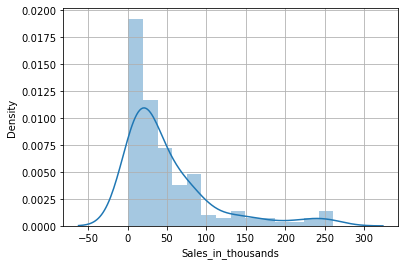

In [27]:
sns.distplot(car_sales_new.Sales_in_thousands)

In [28]:
# as you can see there is a skewness in dependent variable so we will take log of it 

C:\Users\tejan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ln_sales_in_thousands', ylabel='Density'>

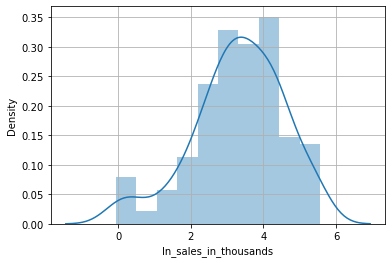

In [29]:
car_sales_new["ln_sales_in_thousands"]= np.log(car_sales_new["Sales_in_thousands"])

sns.distplot(car_sales_new.ln_sales_in_thousands)

In [30]:
car_sales_new.corr()

Sales_in_thousands  four_year_resale_value  \
Sales_in_thousands                 1.000000           -3.075381e-01   
four_year_resale_value            -0.307538            1.000000e+00   
Price_in_thousands                -0.361572            8.323203e-01   
Engine_size                       -0.014342            4.402582e-01   
Horsepower                        -0.259311            6.796053e-01   
Wheelbase                          0.278280           -3.762379e-02   
Width                              0.093054            1.582115e-01   
Length                             0.200997            2.551744e-02   
Curb_weight                       -0.035282            3.043781e-01   
Fuel_capacity                      0.044446            2.842737e-01   
Fuel_efficiency                    0.036677           -3.643418e-01   
Power_perf_factor                 -0.285253            7.305955e-01   
Manufacturer_Audi                 -0.091205            1.463488e-01   
Manufacturer_BMW                  -0.086395            1.368779e-01   
Manufacturer_Buick                 0.026378           -5.092434e-02   
Manufacturer_Cadillac             -0.090411            7.976190e-02   
Manufacturer_Chevrolet             0.044907           -1.045554e-01   
Manufacturer_Chrysler             -0.083727           -5.793061e-02   
Manufacturer_Dodge                 0.150865           -2.985356e-02   
Manufacturer_Ford                  0.504941           -1.291647e-01   
Manufacturer_Honda                 0.212506           -4.569773e-02   
Manufacturer_Hyundai              -0.012960           -1.482623e-01   
Manufacturer_Infiniti             -0.038134            1.367784e-02   
Manufacturer_Jaguar               -0.049608            2.273283e-17   
Manufacturer_Jeep                  0.113038           -3.807465e-02   
Manufacturer_Lexus                -0.115402            1.541779e-01   
Manufacturer_Lincoln              -0.054757            2.955527e-02   
Manufacturer_Mercedes-B           -0.163306            2.926126e-01   
Manufacturer_Mercury              -0.039673           -8.258641e-02   
Manufacturer_Mitsubishi           -0.094453           -8.304436e-02   
Manufacturer_Nissan                0.022424           -6.957982e-02   
Manufacturer_Oldsmobile           -0.073745           -1.966108e-02   
Manufacturer_Plymouth             -0.098685           -1.012489e-01   
Manufacturer_Pontiac               0.036853           -7.130299e-02   
Manufacturer_Porsche              -0.114192            5.122451e-01   
Manufacturer_Saab                 -0.079886            3.225261e-17   
Manufacturer_Saturn               -0.054683           -8.712791e-02   
Manufacturer_Subaru               -0.021816            3.225261e-17   
Manufacturer_Toyota                0.133404           -3.055220e-02   
Manufacturer_Volkswagen           -0.056294           -6.244961e-02   
Manufacturer_Volvo                -0.133361            5.386266e-17   
Vehicle_type_Passenger            -0.230252            7.663782e-02   
ln_sales_in_thousands              0.799513           -4.793496e-01   

                         Price_in_thousands  Engine_size  Horsepower  \
Sales_in_thousands                -0.361572    -0.014342   -0.259311   
four_year_resale_value             0.832320     0.440258    0.679605   
Price_in_thousands                 1.000000     0.618230    0.849851   
Engine_size                        0.618230     1.000000    0.815010   
Horsepower                         0.849851     0.815010    1.000000   
Wheelbase                          0.118080     0.518423    0.325247   
Width                              0.328107     0.702618    0.538115   
Length                             0.158161     0.576386    0.420472   
Curb_weight                        0.527230     0.793937    0.637823   
Fuel_capacity                      0.430942     0.698341    0.526554   
Fuel_efficiency                   -0.505995    -0.757170   -0.611060   
Power_perf_factor                  0

In [31]:
car_sales_new.corr().to_csv('C:/Users/tejan/Desktop/corrm.csv')

<AxesSubplot:>

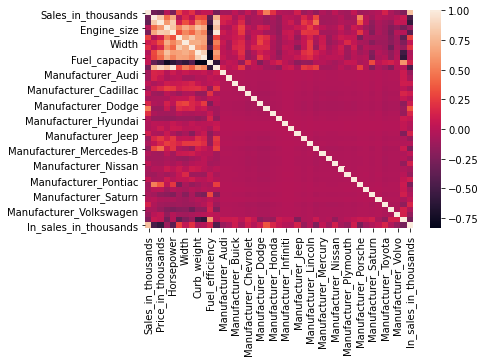

In [32]:

# checkng corelation of variables

# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(car_sales_new.corr())

In [33]:
#Dropping the variables based low correlation with Y
# basically handling variables through Correlation  matrix

In [34]:
car_sales_new.drop([
'Manufacturer_Audi',
'Manufacturer_BMW',
'Manufacturer_Buick',
'Manufacturer_Cadillac',
'Manufacturer_Chevrolet',
'Manufacturer_Chrysler',
'Manufacturer_Dodge',
'Curb_weight',
'Fuel_capacity',
'Manufacturer_Infiniti',
'Manufacturer_Jaguar',
'Manufacturer_Lexus',
'Manufacturer_Lincoln',
'Manufacturer_Mercury',
'Manufacturer_Mitsubishi',
'Manufacturer_Nissan',
'Manufacturer_Oldsmobile',
'Manufacturer_Plymouth',
'Manufacturer_Pontiac',
'Manufacturer_Saab',
'Manufacturer_Saturn',
'Manufacturer_Subaru',
'Manufacturer_Volkswagen'], inplace = True, axis = 1)


<AxesSubplot:>

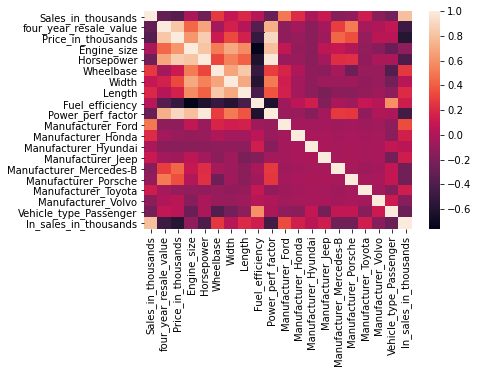

In [35]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(car_sales_new.corr())

In [36]:
car_sales_new.corr().to_csv('C:/Users/tejan/Desktop/corrm1.csv')

In [37]:
car_sales_new.drop([
'Width',
'Length',
'Manufacturer_Hyundai', 'Manufacturer_Mercedes-B'], inplace = True, axis = 1)


In [40]:
car_sales_new.head()

Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
0              16.919                  16.360           21.500000   
1              39.384                  19.875           28.400000   
2              14.114                  18.225           27.328745   
3               8.588                  29.725           42.000000   
4              20.397                  22.255           23.990000   

   Engine_size  Horsepower  Wheelbase  Fuel_efficiency  Power_perf_factor  \
0          1.8       140.0      101.2             28.0          58.280150   
1          3.2       225.0      108.1             25.0          91.370778   
2          3.2       225.0      106.9             26.0          76.849583   
3          3.5       210.0      114.6             22.0          91.389779   
4          1.8       150.0      102.6             27.0          62.777639   

   Manufacturer_Ford  Manufacturer_Honda  Manufacturer_Jeep  \
0                  0                   0                  0   
1                  0                   0                  0   
2                  0                   0                  0   
3                  0                   0                  0   
4                  0                   0                  0   

   Manufacturer_Porsche  Manufacturer_Toyota  Manufacturer_Volvo  \
0                     0                    0                   0   
1                     0                    0                   0   
2                     0                    0                   0   
3                     0                    0                   0   
4                     0                    0                   0   

   Vehicle_type_Passenger  ln_sales_in_thousands  
0                       1               2.828437  
1                       1               3.673360  
2                       1               2.647167  
3                       1               2.150366  
4                       1               3.015388

In [41]:
#Splitting the data
feature_columns = car_sales_new.columns.difference( ['ln_sales_in_thousands', 'Sales_in_thousands'] )
feature_columns

Index(['Engine_size', 'Fuel_efficiency', 'Horsepower', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Jeep', 'Manufacturer_Porsche',
       'Manufacturer_Toyota', 'Manufacturer_Volvo', 'Power_perf_factor',
       'Price_in_thousands', 'Vehicle_type_Passenger', 'Wheelbase',
       'four_year_resale_value'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# basic model
# using statistical approach to build model
train, test = train_test_split( car_sales_new,test_size = 0.3,random_state = 1234 )

In [44]:
len(train)

109

In [45]:
len(test)

48

## Building a linear regression model

In [46]:
import statsmodels.formula.api as smf

In [47]:
train.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Fuel_efficiency',
       'Power_perf_factor', 'Manufacturer_Ford', 'Manufacturer_Honda',
       'Manufacturer_Jeep', 'Manufacturer_Porsche', 'Manufacturer_Toyota',
       'Manufacturer_Volvo', 'Vehicle_type_Passenger',
       'ln_sales_in_thousands'],
      dtype='object')

In [50]:
all_columns = "+".join(train.columns.difference( ['ln_sales_in_thousands', 'Sales_in_thousands'] ))

print(all_columns)

Engine_size+Fuel_efficiency+Horsepower+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Porsche+Manufacturer_Toyota+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+four_year_resale_value


In [51]:
lm = smf.ols(''' ln_sales_in_thousands~ Engine_size+Fuel_efficiency+Horsepower+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Porsche+Manufacturer_Toyota+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+four_year_resale_value''', train).fit()

In [52]:
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.608
Model:                               OLS   Adj. R-squared:                  0.550
Method:                    Least Squares   F-statistic:                     10.43
Date:                   Thu, 04 Feb 2021   Prob (F-statistic):           9.29e-14
Time:                           13:35:47   Log-Likelihood:                -120.80
No. Observations:                    109   AIC:                             271.6
Df Residuals:                         94   BIC:                             312.0
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [53]:
# on the basis of P value dropping insignificant variables
car_sales_new.drop(['Horsepower' ,'Manufacturer_Honda', 'Manufacturer_Porsche', 'Manufacturer_Volvo', 'Power_perf_factor'], axis=1, inplace=True)

In [54]:
car_sales_new.head()

Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
0              16.919                  16.360           21.500000   
1              39.384                  19.875           28.400000   
2              14.114                  18.225           27.328745   
3               8.588                  29.725           42.000000   
4              20.397                  22.255           23.990000   

   Engine_size  Wheelbase  Fuel_efficiency  Manufacturer_Ford  \
0          1.8      101.2             28.0                  0   
1          3.2      108.1             25.0                  0   
2          3.2      106.9             26.0                  0   
3          3.5      114.6             22.0                  0   
4          1.8      102.6             27.0                  0   

   Manufacturer_Jeep  Manufacturer_Toyota  Vehicle_type_Passenger  \
0                  0                    0                       1   
1                  0                    0                       1   
2                  0                    0                       1   
3                  0                    0                       1   
4                  0                    0                       1   

   ln_sales_in_thousands  
0               2.828437  
1               3.673360  
2               2.647167  
3               2.150366  
4               3.015388

### model-2 Building on updated variables

In [55]:
train, test = train_test_split( car_sales_new,test_size = 0.3,random_state = 1234 )

In [56]:
all_columns = "+".join(train.columns.difference( ['ln_sales_in_thousands', 'Sales_in_thousands'] ))

print(all_columns)

Engine_size+Fuel_efficiency+Manufacturer_Ford+Manufacturer_Jeep+Manufacturer_Toyota+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+four_year_resale_value


In [57]:
lm1 = smf.ols(' ln_sales_in_thousands~ Engine_size+Fuel_efficiency+Manufacturer_Ford+Manufacturer_Jeep+Manufacturer_Toyota+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+four_year_resale_value', train).fit()

In [58]:
print(lm1.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.602
Model:                               OLS   Adj. R-squared:                  0.566
Method:                    Least Squares   F-statistic:                     16.63
Date:                   Thu, 04 Feb 2021   Prob (F-statistic):           2.41e-16
Time:                           13:37:56   Log-Likelihood:                -121.69
No. Observations:                    109   AIC:                             263.4
Df Residuals:                         99   BIC:                             290.3
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [59]:
train['pred_ln_sales'] = lm1.predict(train)

<ipython-input-59-2a6a87ef129a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['pred_ln_sales'] = lm1.predict(train)


In [60]:
train.head(10)

Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
24               17.947               36.225000             45.7050   
99                0.954               18.020008             78.4798   
8                 9.231               28.675000             33.4000   
20              135.126               11.225000             16.5350   
22               42.593               11.525000             19.3900   
73                6.375               40.375000             54.0050   
36                4.734               12.545000             19.0450   
134              47.107               18.020008             22.6950   
32               13.462               17.325000             28.3400   
147              51.102               16.725000             21.2000   

     Engine_size  Wheelbase  Fuel_efficiency  Manufacturer_Ford  \
24           5.7      104.5             22.0                  0   
99           5.0      113.6             20.0                  0   
8            2.8      107.3             24.0                  0   
20           3.1      107.0             25.0                  0   
22           3.4      110.5             27.0                  0   
73           4.0      112.2             22.0                  0   
36           2.5      103.7             24.0                  0   
134          2.5      103.5             25.0                  0   
32           3.5      113.0             23.0                  0   
147          1.8      106.4             27.0                  0   

     Manufacturer_Jeep  Manufacturer_Toyota  Vehicle_type_Passenger  \
24                   0                    0                       1   
99                   0                    0                       1   
8                    0                    0                       1   
20                   0                    0                       1   
22                   0                    0                       1   
73                   0                    0                       1   
36                   0                    0                       1   
134                  0                    0                       1   
32                   0                    0                       1   
147                  0                    0                       1   

     ln_sales_in_thousands  pred_ln_sales  
24                2.887423       3.064339  
99               -0.047092       0.254740  
8                 2.222567       2.766376  
20                4.906208       3.726667  
22                3.751690       3.975814  
73                1.852384       2.171807  
36                1.554771       3.100722  
134               3.852422       3.049605  
32                2.599871       3.312662  
147               3.933824       3.105069

In [61]:
test['pred_ln_sales']  = lm1.predict(test)

<ipython-input-61-4857280342f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_ln_sales']  = lm1.predict(test)


In [62]:
test.head()

Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
58             230.902               13.210000              15.350   
91              20.380               14.795000              22.510   
98              11.592               18.020008              41.600   
29              32.775               14.180000              24.495   
6                1.380               39.000000              62.000   

    Engine_size  Wheelbase  Fuel_efficiency  Manufacturer_Ford  \
58          2.3      106.9             27.0                  0   
91          3.3      112.2             21.0                  0   
98          3.2      105.9             26.0                  0   
29          2.5      106.0             24.0                  0   
6           4.2      113.0             21.0                  0   

    Manufacturer_Jeep  Manufacturer_Toyota  Vehicle_type_Passenger  \
58                  0                    0                       1   
91                  0                    0                       0   
98                  0                    0                       1   
29                  0                    0                       1   
6                   0                    0                       1   

    ln_sales_in_thousands  pred_ln_sales  
58               5.441993       3.668341  
91               3.014554       3.764858  
98               2.450315       2.214498  
29               3.489666       2.856313  
6                0.322083       1.618990

In [63]:
train['actual_sales'] = np.exp(train.ln_sales_in_thousands)
test['actual_sales'] = np.exp(test.ln_sales_in_thousands)

train['pred_sales'] = np.exp(train.pred_ln_sales)
test['pred_sales'] = np.exp(test.pred_ln_sales)


<ipython-input-63-8effbff7c8e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['actual_sales'] = np.exp(train.ln_sales_in_thousands)
<ipython-input-63-8effbff7c8e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['actual_sales'] = np.exp(test.ln_sales_in_thousands)
<ipython-input-63-8effbff7c8e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [65]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
import scipy.stats as stats

In [67]:
MAPE_train = np.mean(np.abs(train.actual_sales - train.pred_sales)/train.actual_sales )
print(MAPE_train)

RMSE_train = metrics.mean_squared_error(train.actual_sales , train.pred_sales)
print(RMSE_train)

print('test data set................')

#Test Data
MAPE_test = np.mean(np.abs(test.actual_sales - test.pred_sales)/test.actual_sales )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.actual_sales , test.pred_sales)
print(RMSE_test)


0.7576154191289808
1804.8924101893072
test data set................
1.4738620073350452
2681.046148101535


## Decile Analysis on linear regression

In [70]:
train['Deciles']=pd.qcut(train['pred_sales'],10, labels=False)
test['Deciles']=pd.qcut(test['pred_sales'],10, labels=False)
test.head()

<ipython-input-70-a550883e9138>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Deciles']=pd.qcut(train['pred_sales'],10, labels=False)
<ipython-input-70-a550883e9138>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Deciles']=pd.qcut(test['pred_sales'],10, labels=False)


Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
58             230.902               13.210000              15.350   
91              20.380               14.795000              22.510   
98              11.592               18.020008              41.600   
29              32.775               14.180000              24.495   
6                1.380               39.000000              62.000   

    Engine_size  Wheelbase  Fuel_efficiency  Manufacturer_Ford  \
58          2.3      106.9             27.0                  0   
91          3.3      112.2             21.0                  0   
98          3.2      105.9             26.0                  0   
29          2.5      106.0             24.0                  0   
6           4.2      113.0             21.0                  0   

    Manufacturer_Jeep  Manufacturer_Toyota  Vehicle_type_Passenger  \
58                  0                    0                       1   
91                  0                    0                       0   
98                  0                    0                       1   
29                  0                    0                       1   
6                   0                    0                       1   

    ln_sales_in_thousands  pred_ln_sales  actual_sales  pred_sales  Deciles  
58               5.441993       3.668341       230.902   39.186824        7  
91               3.014554       3.764858        20.380   43.157574        8  
98               2.450315       2.214498        11.592    9.156807        1  
29               3.489666       2.856313        32.775   17.397262        2  
6                0.322083       1.618990         1.380    5.047991        1

In [71]:
# Decile Analysis for train data
Predicted_avg = train[['Deciles','pred_sales']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred_sales']
Actual_avg = train[['Deciles','actual_sales']].groupby(train.Deciles).mean().sort_index(ascending=False)['actual_sales']

Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_train

pred_sales  actual_sales
Deciles                          
9        173.282587    148.087756
8         69.086527    104.651938
7         47.807186     65.270636
6         34.061048     46.976273
5         29.336824     35.085300
4         25.441383     39.528182
3         21.701296     29.525636
2         17.722550     21.030273
1         13.905849     13.323025
0          6.717604      9.896636

In [72]:
###############################################################

#Possible reasons for model is not validating (over fitting)

#Data preparation problem (outliers, missings, variable conversions etc. not correct)
#not included right variables
#If the data have multicollinerity
#Including more number of variables 
#Data size is very low  (ideally we should have 1varaible = 100 obs)
#The assumptions are not 100% valid
#The variables are not explaining completely


# how to over come this problem
#Increase the data size
# Change the variables - Reiterate the model with different combinations of variables
# Apply right transformations on X variables such the the linear relationship between Y & X will imrpvove
#Add dervied variables which can explain Y better
#Re look into data preparation steps
#Look at the Importance of variables include them in the model
#Change the technique

In [80]:
residuals = train['pred_sales'] - train['actual_sales']

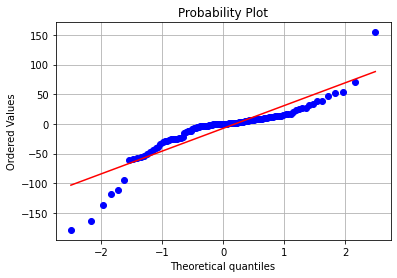

In [81]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

C:\Users\tejan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

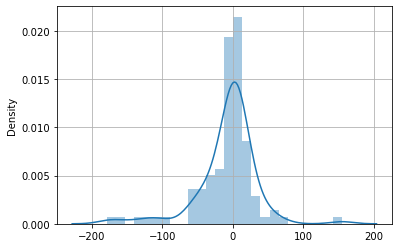

In [82]:
sns.distplot( residuals )